In [6]:
# Install if not already installed
!pip install pandas matplotlib seaborn nltk textblob

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
import re
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from google.colab import files
uploaded = files.upload()



Saving LINKEDIN_REVIEWS.csv.zip to LINKEDIN_REVIEWS.csv.zip


In [8]:
import zipfile
import io

# Replace 'linkedin_reviews.csv.zip' with your actual uploaded filename
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()  # This extracts all files in the zip to the current directory


In [9]:
import os
os.listdir()



['.config',
 '.ipynb_checkpoints',
 'LINKEDIN_REVIEWS.csv',
 'LINKEDIN_REVIEWS.csv.zip',
 'sample_data']

In [12]:
import pandas as pd

df = pd.read_csv("LINKEDIN_REVIEWS.csv")  # Use the actual CSV filename
df.head()


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58


In [14]:
import re

# Drop rows with missing reviews
df = df.dropna(subset=['review_text'])

# Clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove punctuation/numbers
    return text

df['cleaned_review'] = df['review_text'].apply(clean_text)
df[['review_text', 'cleaned_review']].head()


<ipython-input-14-e4e9c9558685>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['review_text'].apply(clean_text)


,review_text,cleaned_review
0,Well designed app. It's much easier to use tha...,well designed app its much easier to use than ...
1,Cool!,cool
2,Great to finally see this on the market!,great to finally see this on the market
3,Great app,great app
4,Finally! Would love a Homeycomb specific versi...,finally would love a homeycomb specific versio...


In [15]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
df[['review_text', 'sentiment']].head()


<ipython-input-15-b82933c296f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['cleaned_review'].apply(get_sentiment)


,review_text,sentiment
0,Well designed app. It's much easier to use tha...,Positive
1,Cool!,Positive
2,Great to finally see this on the market!,Positive
3,Great app,Positive
4,Finally! Would love a Homeycomb specific versi...,Positive


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
df.shape


(320925, 11)

In [17]:
df['sentiment'].value_counts()


,count
sentiment,
Positive,214911
Neutral,74843
Negative,31171


In [18]:
df.to_csv("linkedin_reviews_with_sentiment.csv", index=False)


In [19]:
from google.colab import files
files.download("linkedin_reviews_with_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-21-a12eef151a9f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


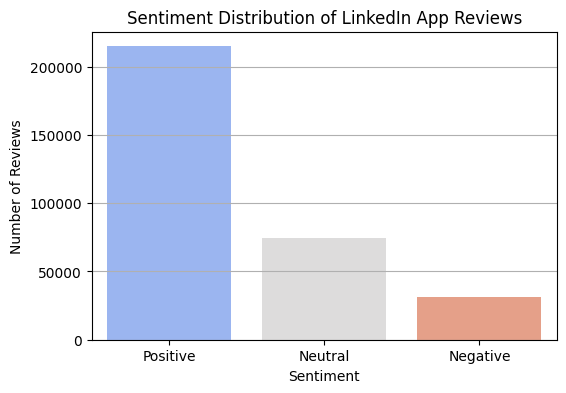

In [21]:
# sentiment distribution chart

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title("Sentiment Distribution of LinkedIn App Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.show()


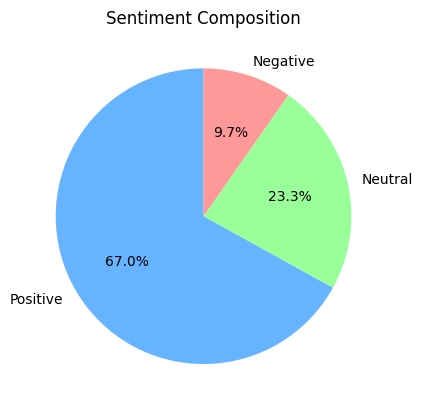

In [24]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Sentiment Composition")
plt.ylabel('')
plt.show()


In [26]:
df['review_date'] = pd.to_datetime(df['review_timestamp'])  # ✅ No 'unit' needed


<ipython-input-26-982274f78c5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_date'] = pd.to_datetime(df['review_timestamp'])  # ✅ No 'unit' needed


<ipython-input-27-14118193c0f1>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment'].value_counts().unstack().fillna(0)


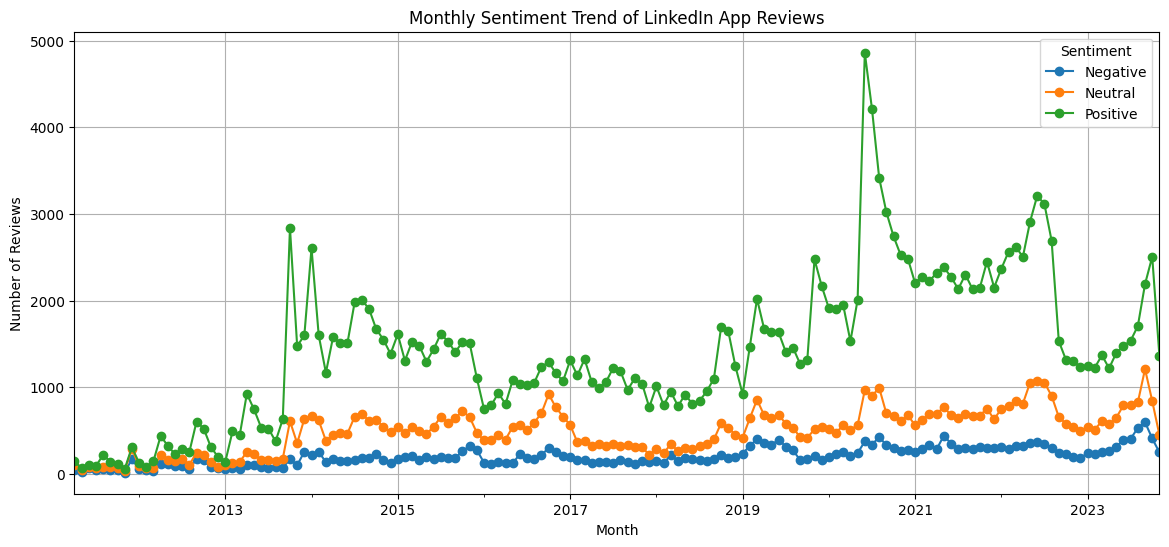

In [27]:
# Set review_date as index
df = df.set_index('review_date')

# Resample monthly and count sentiment
monthly_sentiment = df.resample('M')['sentiment'].value_counts().unstack().fillna(0)

# Plot
monthly_sentiment.plot(figsize=(14,6), marker='o')
plt.title("Monthly Sentiment Trend of LinkedIn App Reviews")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.legend(title="Sentiment")
plt.show()


In [28]:
!pip install wordcloud


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


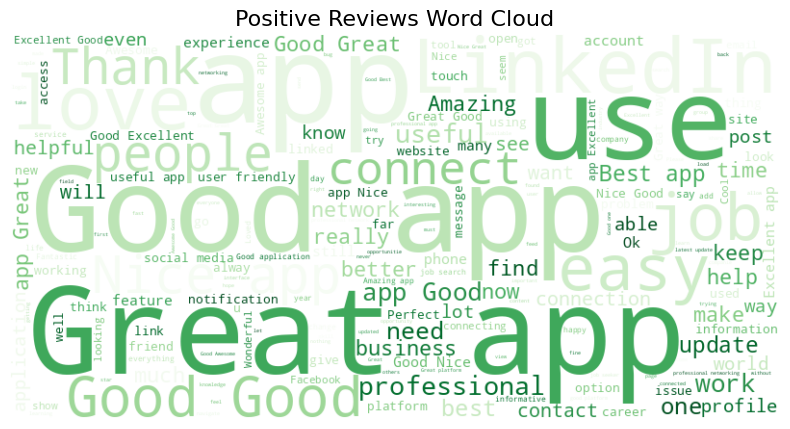

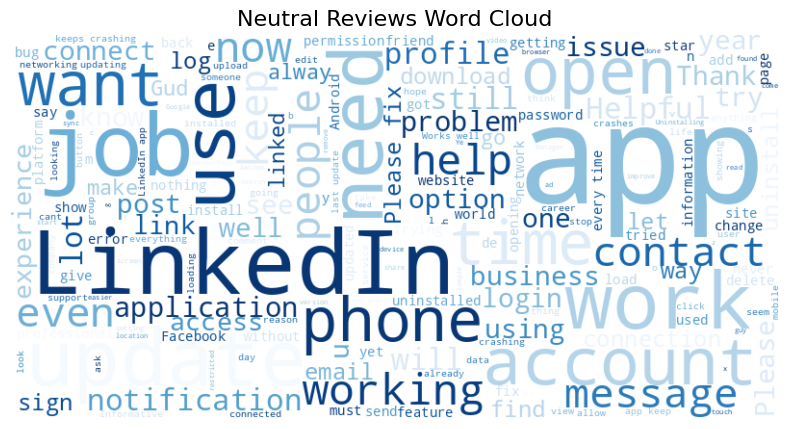

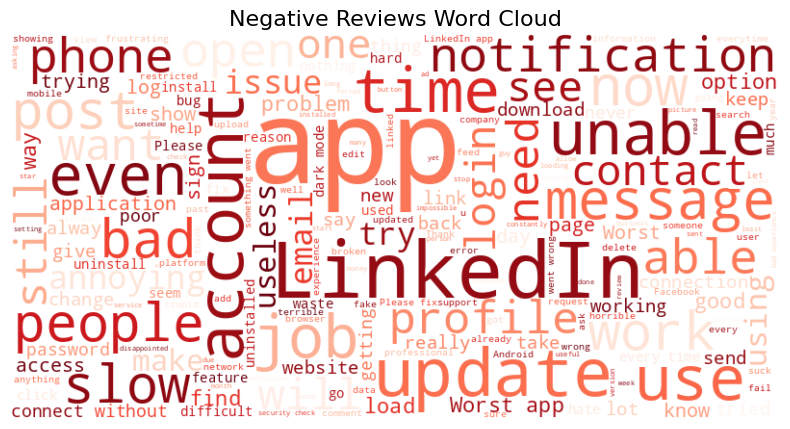

In [30]:
# Define a function to join all review_texts for a sentiment group
def generate_wordcloud(sentiment_label, color='black'):
    text = " ".join(review for review in df[df['sentiment'] == sentiment_label]['review_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{sentiment_label} Reviews Word Cloud", fontsize=16)
    plt.show()

# Word clouds for each sentiment
generate_wordcloud("Positive", color='Greens')
generate_wordcloud("Neutral", color='Blues')
generate_wordcloud("Negative", color='Reds')


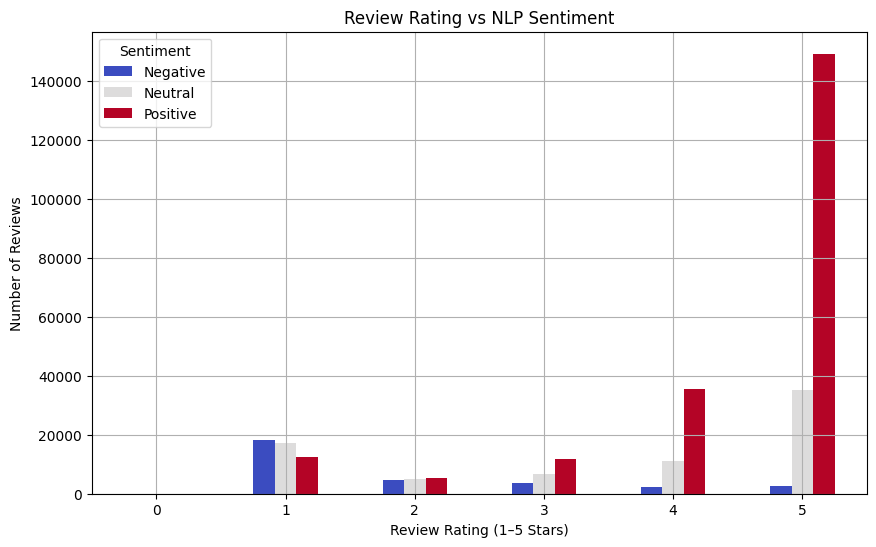

In [31]:
import seaborn as sns

# Crosstab of sentiment vs rating
sentiment_vs_rating = pd.crosstab(df['review_rating'], df['sentiment'])

# Plot
sentiment_vs_rating.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Review Rating vs NLP Sentiment")
plt.xlabel("Review Rating (1–5 Stars)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()
